# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations
1) There is a strong correlation between max temperature and latitude in both hemispheres.  It is clear that the max temperatures are warmer the closer you get to the equator.
2)Based on this data set, the northern hemisphere tends to be less humid than the southern hemisphere.
3)Beyond the relationship between latitude and temperature, there are no other trends showing.  Humidity, cloudiness and windspeed all have low correlations to latitude within this data set.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
# If the city is unique, then add it to a our cities list    
    if city not in cities:
        cities.append(city)  
# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base URL for making API calls on openweathermap.org
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
# Use counter to batch requests so as not to exceed request limit
counter = 0
# Use batch counter to reflect pull of new set in print log
batch_counter = 1
# Use record counter to reflect record number of each city in print log
record_counter = 1

# Set maximum number of cities to pull so for loop stops if all required cities are retrieved
max_cities = 526
# Set up empty lists to hold the data contents of the request response
max_temp = []
lat = []
lon = []
humidity = []
cloudy = []
wind_speed = []
city_name = []
country = []
date = []

# Create for loop to loop through all cities found in citipy in the cell above
for city in cities:
# Amend URL to include city to query, incorporate api key and set units to American standards
    query_url = f"{base_url}{city}&appid={weather_api_key}&units=imperial"
# Check to see if we have already reached the max number of cities before continuing    
    if len(city_name) < max_cities:
# Check to make sure we're still within the current batch search limit
        if counter < 50:
# Attempt to request and return data on each city
            try:      
                response = requests.get(query_url)
                response_json = response.json()     
# Check to be sure we haven't already gathered data on this city before continuing
                if city not in city_name:                    
# Append received data to the empty lists set up above the for loop
# Use try and except to keep the loop moving on several data points
                    city_name.append(response_json["name"])
                    country.append(response_json["sys"]["country"])
                    lat.append(response_json["coord"]["lat"])
                    lon.append(response_json["coord"]["lon"])  
                    date.append(response_json["dt"])
                    try:
                        max_temp.append(response_json["main"]["temp_max"])
                    except:
                        print("This {city} has no information on temperature")
                        pass
                    try:
                        humidity.append(response_json["main"]["humidity"])
                    except:
                        print("This {city} has no information on humidity")
                        pass
                    try:
                        cloudy.append(response_json['clouds']["all"])
                    except:
                        print("This {city} has no information on cloudiness")
                        pass                        
                    try:
                        wind_speed.append(response_json["wind"]["speed"])
                    except:
                        print("This {city} has no information on wind speed")
                        pass 
# Begin printing log of record processing
                print(f"Processing Record {record_counter} for Set{batch_counter}:|{city}")
# Update counter for the next record
                counter += 1
# Update record counter for the next record
                record_counter += 1
# If city is not found, print message that city will be skipped and move to the next city
            except:
                print(f"City not found....skipping")
                pass
# If we have reached the counter limit of 50, start a new batch, update the batch counter for the next batch
# Implement timer after previous batch for one minute break between batches
        else:
            counter = 0
            batch_counter += 1
            time.sleep(60)

Processing Record 1 for Set1:|hilo
Processing Record 2 for Set1:|mar del plata
Processing Record 3 for Set1:|guerrero negro
City not found....skipping
Processing Record 4 for Set1:|ushuaia
Processing Record 5 for Set1:|berlevag
City not found....skipping
Processing Record 6 for Set1:|upernavik
Processing Record 7 for Set1:|vaini
Processing Record 8 for Set1:|albany
Processing Record 9 for Set1:|tasiilaq
Processing Record 10 for Set1:|nouadhibou
Processing Record 11 for Set1:|flinders
Processing Record 12 for Set1:|cape town
Processing Record 13 for Set1:|ambilobe
Processing Record 14 for Set1:|atuona
Processing Record 15 for Set1:|cermik
Processing Record 16 for Set1:|ahmadpur east
Processing Record 17 for Set1:|lukiv
Processing Record 18 for Set1:|rikitea
Processing Record 19 for Set1:|deputatskiy
Processing Record 20 for Set1:|menomonie
Processing Record 21 for Set1:|sao felix do xingu
Processing Record 22 for Set1:|anloga
Processing Record 23 for Set1:|busselton
Processing Record 24

Processing Record 191 for Set4:|pleshanovo
Processing Record 192 for Set4:|tahta
City not found....skipping
Processing Record 193 for Set4:|omboue
Processing Record 194 for Set4:|rosetta
Processing Record 195 for Set4:|varena
Processing Record 196 for Set4:|urusha
Processing Record 197 for Set4:|tala
Processing Record 198 for Set4:|klyuchi
Processing Record 199 for Set4:|severo-kurilsk
Processing Record 200 for Set4:|khatanga
Processing Record 201 for Set5:|conakry
Processing Record 202 for Set5:|torbay
Processing Record 203 for Set5:|natal
Processing Record 204 for Set5:|burnie
City not found....skipping
City not found....skipping
Processing Record 205 for Set5:|tabory
Processing Record 206 for Set5:|gamba
Processing Record 207 for Set5:|luderitz
Processing Record 208 for Set5:|andujar
Processing Record 209 for Set5:|el progreso
Processing Record 210 for Set5:|marshall
Processing Record 211 for Set5:|carthage
Processing Record 212 for Set5:|svetlogorsk
Processing Record 213 for Set5:|

Processing Record 385 for Set8:|sharjah
Processing Record 386 for Set8:|palmerston
Processing Record 387 for Set8:|jiupu
Processing Record 388 for Set8:|vilcun
Processing Record 389 for Set8:|anguillara sabazia
Processing Record 390 for Set8:|shingu
Processing Record 391 for Set8:|villa carlos paz
Processing Record 392 for Set8:|dukat
Processing Record 393 for Set8:|wajir
Processing Record 394 for Set8:|rio grande
Processing Record 395 for Set8:|bud
Processing Record 396 for Set8:|ushtobe
Processing Record 397 for Set8:|axim
Processing Record 398 for Set8:|saint-philippe
Processing Record 399 for Set8:|crotone
Processing Record 400 for Set8:|tyup
Processing Record 401 for Set9:|russell
Processing Record 402 for Set9:|quchan
Processing Record 403 for Set9:|san patricio
Processing Record 404 for Set9:|chebenki
Processing Record 405 for Set9:|mahanje
Processing Record 406 for Set9:|alofi
Processing Record 407 for Set9:|carutapera
Processing Record 408 for Set9:|wolkersdorf
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create data frame for all city data collected
city_group = {"City":city_name,
             "Lat":lat,
             "Lng":lon,
             "Max Temp": max_temp,
             "Humidity": humidity,
             "Cloudiness": cloudy,
             "Wind Speed": wind_speed,
             "Country": country,
             "Date": date}

city_df = pd.DataFrame(city_group)
# Send dataframe output to csv file.
city_df.to_csv(output_data_file)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,80.60,61,75,13.80,US,1619218925
1,Mar del Plata,-38.0023,-57.5575,69.80,78,0,6.91,AR,1619218926
2,Guerrero Negro,27.9769,-114.0611,64.04,62,10,22.10,MX,1619218926
3,Ushuaia,-54.8000,-68.3000,42.80,87,75,4.61,AR,1619218809
4,Berlevåg,70.8578,29.0864,33.03,84,81,13.80,NO,1619218815


In [6]:
# Display dataframe statistical data
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,5.260000e+02
mean,18.712754,17.441246,59.893688,70.593156,51.720532,7.661901,1.619219e+09
std,33.552851,89.743417,18.693331,22.066779,38.256526,5.071528,2.316913e+02
min,-54.800000,-175.200000,3.400000,6.000000,0.000000,0.400000,1.619219e+09
25%,-9.440650,-59.321725,45.707500,61.000000,14.000000,3.690000,1.619219e+09
50%,23.262100,21.699100,62.010000,77.000000,55.500000,6.710000,1.619219e+09
75%,46.433750,91.535050,76.835000,87.000000,90.000000,10.360000,1.619219e+09
max,78.218600,179.316700,100.400000,100.000000,100.000000,32.300000,1.619220e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Locate any cities with humidity in excess of 100
high_humidity = city_df.loc[city_df["Humidity"] > 100,:]    
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.
high_humidity.index

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(city_df[city_df['Humidity'] > 100].index, inplace = False)
clean_city_df = clean_city_df.reset_index(drop = True)
clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,80.60,61,75,13.80,US,1619218925
1,Mar del Plata,-38.0023,-57.5575,69.80,78,0,6.91,AR,1619218926
2,Guerrero Negro,27.9769,-114.0611,64.04,62,10,22.10,MX,1619218926
3,Ushuaia,-54.8000,-68.3000,42.80,87,75,4.61,AR,1619218809
4,Berlevåg,70.8578,29.0864,33.03,84,81,13.80,NO,1619218815


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

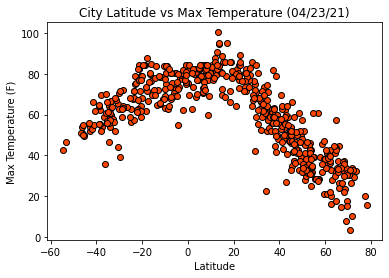

In [58]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o", color = "orangered", edgecolor = "black")
plt.title("City Latitude vs Max Temperature (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

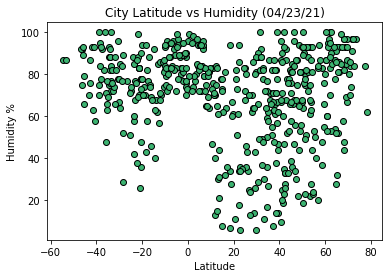

In [59]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o", color = "mediumseagreen", edgecolor = "black")
plt.title("City Latitude vs Humidity (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.savefig("output_data/City Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

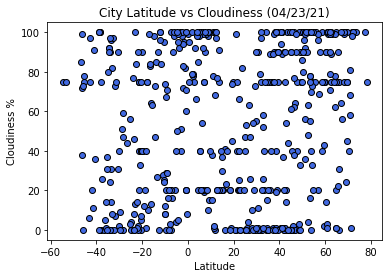

In [60]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o", color = "royalblue", edgecolor = "black")
plt.title("City Latitude vs Cloudiness (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig("output_data/City Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

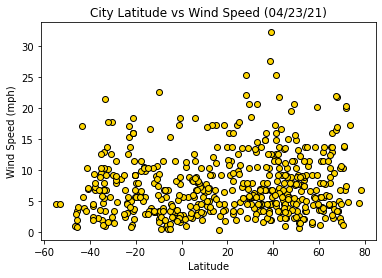

In [61]:
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o", color = "gold", edgecolor = "black")
plt.title("City Latitude vs Wind Speed (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8863058197010363.


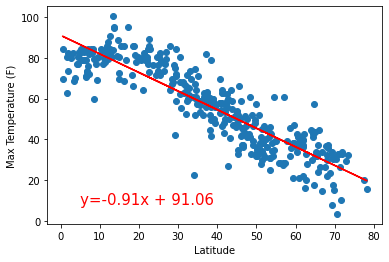

In [62]:
north_cities = clean_city_df.loc[clean_city_df["Lat"]>= 0,:]
x_axis = north_cities["Lat"]
y_axis = north_cities["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(5,8),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7342852135468846.


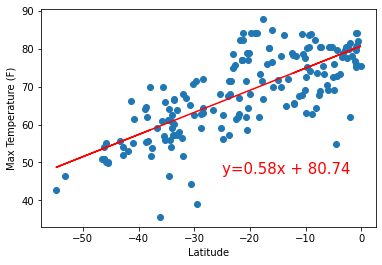

In [63]:
south_cities = clean_city_df.loc[clean_city_df["Lat"]< 0,:]
x_axis = south_cities["Lat"]
y_axis = south_cities["Max Temp"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-25,47),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.11709749987345722.


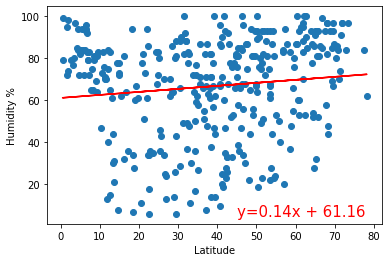

In [64]:
x_axis = north_cities["Lat"]
y_axis = north_cities["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(45,5),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.06802178311172202.


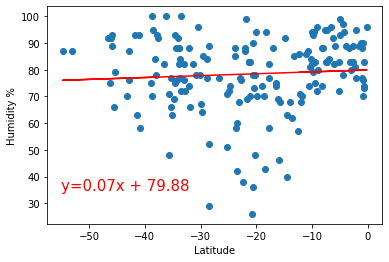

In [65]:
x_axis = south_cities["Lat"]
y_axis = south_cities["Humidity"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-55,35),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1839076811721939.


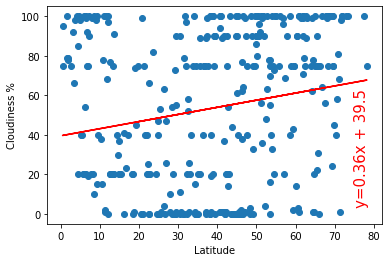

In [66]:
x_axis = north_cities["Lat"]
y_axis = north_cities["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(75,5),fontsize=15, color="red", rotation=90)
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.06709605165900163.


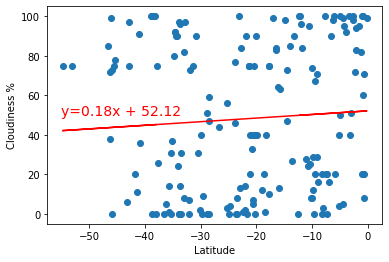

In [67]:
x_axis = south_cities["Lat"]
y_axis = south_cities["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-55,50),fontsize=14, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.05909797872591126.


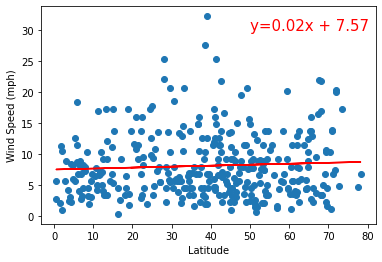

In [68]:
x_axis = north_cities["Lat"]
y_axis = north_cities["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(50,30),fontsize=15, color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.046155699878684966.


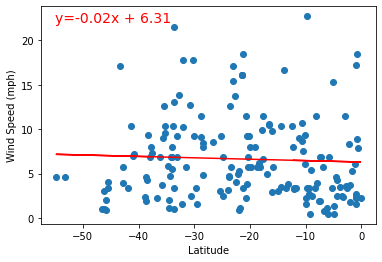

In [69]:
x_axis = south_cities["Lat"]
y_axis = south_cities["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-55,22),fontsize=14,color="red")
print(f"The r-value is {rvalue}.")
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()